<a href="https://colab.research.google.com/github/Iannoh-png/Week-3-Assignment-AI-Module/blob/main/CNN_Model_with_PYTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt # For optional visualization
import numpy as np # For numerical operations with matplotlib


Using device: cpu
MNIST datasets loaded successfully. Train samples: 60000, Test samples: 10000

CNN Model Architecture:
CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

Starting model training...
Epoch [1/5], Step [100/938], Loss: 0.2416
Epoch [1/5], Step [200/938], Loss: 0.0791
Epoch [1/5], Step [300/938], Loss: 0.0647
Epoch [1/5], Step [400/938], Loss: 0.3918
Epoch [1/5], Step [500/938], Loss: 0.0545
Epoch [1/5], Step [600/938], Loss: 0.0610
Epoch [1/5], Step [700/938], Loss: 0.0288
Epoch [1/5], Step [800/938], Loss: 0.0529
Epoch [1/5], Step [900/938], Loss: 0.0771
Epoch [2/5], Step [100/938], Loss: 0.0195
Ep

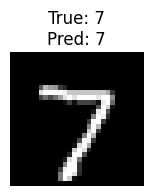

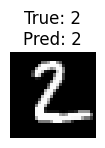

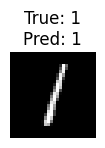

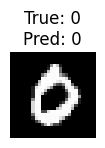

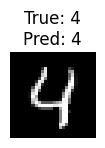

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- 1. Device Configuration ---
# Check if CUDA (GPU support) is available, otherwise use CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# --- 2. Hyperparameters ---
num_epochs = 5        # Number of times to iterate over the entire training dataset
batch_size = 64      # Number of images processed at once during training
learning_rate = 0.001 # Step size for the optimizer to adjust weights

# --- 3. Data Loading and Preprocessing ---

# Define transformations for the MNIST images.
# Compose multiple transformations into a single pipeline.
transform = transforms.Compose([
    transforms.ToTensor(), # Converts PIL Image or numpy.ndarray to FloatTensor and scales pixels to [0, 1]
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize pixel values to mean 0.1307 and std 0.3081 (common for MNIST)
])

# Load the MNIST training dataset.
# If the dataset is not available locally, it will be downloaded.
train_dataset = torchvision.datasets.MNIST(
    root='./data',      # Directory where the dataset will be stored/loaded from
    train=True,         # Specifies this is the training set
    transform=transform,# Apply the defined transformations
    download=True       # Download the dataset if not found
)

# Load the MNIST test dataset.
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,        # Specifies this is the test set
    transform=transform,
    download=True
)

# Create DataLoaders for efficient batch processing.
# DataLoader iterates over the dataset, shuffles it, and batches samples.
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True # Shuffle training data for better generalization
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False # No need to shuffle test data
)

print(f"MNIST datasets loaded successfully. Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")

# --- 4. Define the Convolutional Neural Network (CNN) ---

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        # First Convolutional Layer:
        # Input channels: 1 (for grayscale images)
        # Output channels: 16
        # Kernel size: 5x5
        # Stride: 1 (default)
        # Padding: 2 (to maintain output spatial dimensions: (W-F+2P)/S + 1 = (28-5+2*2)/1 + 1 = 28)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU() # Activation function for non-linearity
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Max Pooling Layer (reduces spatial dimensions by half)
        # Output size after conv1+pool1: (16, 14, 14)

        # Second Convolutional Layer:
        # Input channels: 16 (from previous layer's output)
        # Output channels: 32
        # Kernel size: 5x5
        # Stride: 1 (default)
        # Padding: 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Max Pooling Layer
        # Output size after conv2+pool2: (32, 7, 7)

        # Fully Connected Layer:
        # Input features: 32 channels * 7 * 7 (flattened output from conv layers)
        # Output features: num_classes (10 for digits 0-9)
        self.fc = nn.Linear(32 * 7 * 7, num_classes)

    def forward(self, x):
        # Apply first convolution, ReLU, and pooling
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)

        # Apply second convolution, ReLU, and pooling
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)

        # Flatten the output for the fully connected layer
        # -1 infers the batch size dimension, 32*7*7 flattens the feature maps
        out = out.reshape(out.size(0), -1)

        # Apply the fully connected layer
        out = self.fc(out)
        return out

# Instantiate the CNN model and move it to the configured device (GPU/CPU)
model = CNN(num_classes=10).to(device)
print(f"\nCNN Model Architecture:\n{model}")

# --- 5. Define Loss Function and Optimizer ---

# Loss function: CrossEntropyLoss is suitable for multi-class classification.
# It automatically applies Softmax and NLLLoss.
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam is an adaptive learning rate optimizer.
# It updates model parameters to minimize the loss.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- 6. Train the Model ---

print("\nStarting model training...")
total_steps = len(train_loader)
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # Calculate the batch loss
        loss = criterion(outputs, labels)

        # Backward and optimize: zero gradients, perform backpropagation, and update weights
        optimizer.zero_grad() # Clear previous gradients
        loss.backward()       # Compute gradients of the loss with respect to model parameters
        optimizer.step()      # Perform a single optimization step (parameter update)

        # Print training progress
        if (i + 1) % 100 == 0: # Print every 100 batches
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

print("\nModel training finished.")

# --- 7. Evaluate the Model ---

# Set the model to evaluation mode (e.g., turns off dropout layers)
model.eval()
# Disable gradient calculation during evaluation (saves memory and speeds up computation)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # Get the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0) # Accumulate total number of samples
        correct += (predicted == labels).sum().item() # Accumulate number of correct predictions

# Calculate and print the final test accuracy
test_accuracy = 100 * correct / total
print(f'\nAccuracy of the model on the 10000 test images: {test_accuracy:.2f}%')

# --- 8. Visualize some predictions ---
# This section visualizes 5 sample images along with their true and predicted labels.
# It requires `matplotlib` to be installed (`pip install matplotlib`).

def imshow(img_tensor, title=""):
    # Unnormalize: reverse the Normalize transformation.
    # The normalization was: (x - mean) / std. So, x = x * std + mean.
    # For MNIST, mean = 0.1307, std = 0.3081.
    img_tensor = img_tensor * 0.3081 + 0.1307
    npimg = img_tensor.numpy()
    # Transpose from (C, H, W) to (H, W, C) for matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off') # Hide axes
    plt.show()

# Get a batch of test images and labels from the test_loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Move images to CPU for visualization if they were on GPU
images_cpu = images.cpu()
labels_cpu = labels.cpu()

# Make predictions on these images using the trained model
# Ensure the model is in evaluation mode and move images to the correct device
model.eval()
with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs, 1)

predicted_cpu = predicted.cpu() # Move predictions to CPU

print("\nVisualizing 5 sample predictions:")
plt.figure(figsize=(10, 3)) # Adjust figure size for 5 images

# Display 5 images with their true and predicted labels
for i in range(5): # Loop for 5 images
    plt.subplot(1, 5, i + 1) # 1 row, 5 columns, i+1th plot
    imshow(images_cpu[i], title=f"True: {labels_cpu[i].item()}\nPred: {predicted_cpu[i].item()}")
plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()